In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('ushape.csv')
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


In [16]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

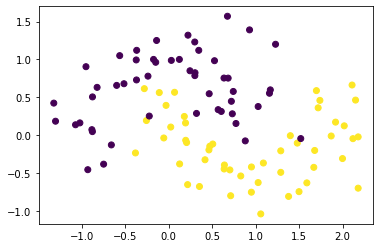

In [17]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X,y)
y_pred=lr.predict(X)
accuracy_score(y,y_pred)

0.84

<AxesSubplot:>

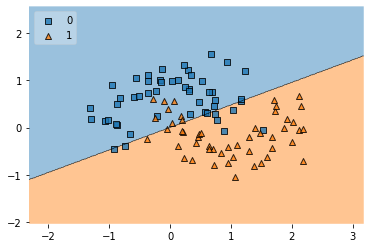

In [19]:
plot_decision_regions(X,y.astype('int'),clf=lr,legend=2)

## Using PolyNomial Features - Captures the Non Linearality Using Logistics Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures
p=PolynomialFeatures(degree=5)
X_trf = p.fit_transform(X)

In [25]:
clf = LogisticRegression()
clf.fit(X_trf,y)
y_pred=clf.predict(X_trf)
accuracy_score(y,y_pred)

0.93

In [30]:
from sklearn.model_selection import cross_val_score
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

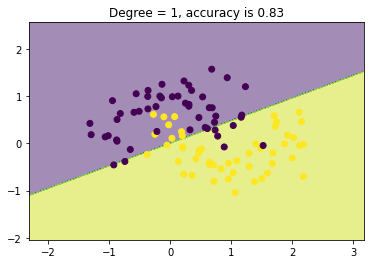

In [31]:
plot_decision_boundary(X,y)

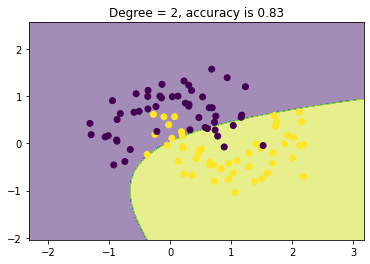

In [32]:
plot_decision_boundary(X,y,degree=2)

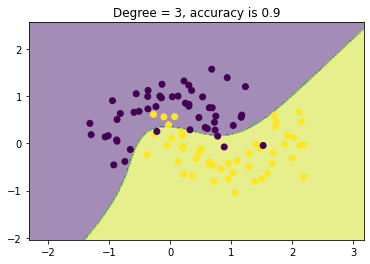

In [33]:
plot_decision_boundary(X,y,degree=3)

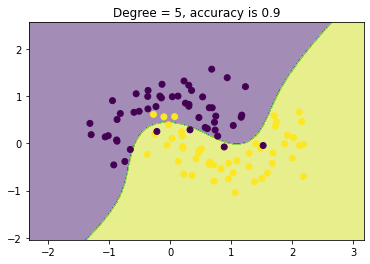

In [34]:
plot_decision_boundary(X,y,degree=5)